<a href="https://colab.research.google.com/github/DheerajPranav/NeuroForge/blob/main/obesity-knn-classifier/k_Fit_Classifying_Obesity_with_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obesity Dataset with k-Nearest Neighbors

> Add blockquote




## Context

Welcome to the **Scaler Healthcare** data analysis team! As part of our ongoing efforts to understand and combat obesity globally, we're leveraging data to gain insights into factors contributing to obesity. You've been tasked with analyzing the Obesity Dataset, applying the k-Nearest Neighbors (kNN) algorithm to predict obesity levels based on individuals' eating habits and physical conditions.

## Dataset Description

The dataset you'll be working with contains attributes related to individuals' eating habits and physical conditions. Here's a breakdown of the features you'll encounter:

### Eating Habits Attributes:
1. **FAVC (Frequent consumption of high caloric food):** Indicates if the individual frequently eats high caloric food.
2. **FCVC (Frequency of consumption of vegetables):** Reflects how often the individual consumes vegetables.
3. **NCP (Number of main meals):** Represents the number of main meals the individual has in a day.
4. **CAEC (Consumption of food between meals):** Shows how frequently the individual eats between meals.
5. **CH20 (Consumption of water daily):** Details the daily water consumption.
6. **CALC (Consumption of alcohol):** Provides information on the individual's alcohol consumption.

### Physical Condition Attributes:
7. **SCC (Calories consumption monitoring):** Indicates if the individual monitors their calorie intake.
8. **FAF (Physical activity frequency):** Reflects the frequency of physical activity.
9. **TUE (Time using technology devices):** Denotes the time spent using technology devices.
10. **MTRANS (Transportation used):** Details the primary mode of transportation.

In [1]:
# Downloading the Dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/840/original/ObesityDataSet.csv

--2025-07-05 19:46:43--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/840/original/ObesityDataSet.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.181, 13.224.9.129, 13.224.9.103, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263646 (257K) [text/plain]
Saving to: ‘ObesityDataSet.csv’

ObesityDataSet.csv  100%[===================>] 257.47K  --.-KB/s    in 0.03s   

2025-07-05 19:46:43 (9.78 MB/s) - ‘ObesityDataSet.csv’ saved [263646/263646]



In [2]:
import pandas as pd

df = pd.read_csv("ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


---

# KNN Lecture-1 Assesments

---

## Analyzing Skewness in the Obesity Dataset

### Context
You are tasked with exploring the Obesity dataset to understand the distribution of various features, especially focusing on skewness. This analysis is crucial for applying the kNN algorithm effectively.

### Dataset
The dataset includes attributes related to individuals' eating habits and physical conditions. You'll examine these features to identify any right-skewness and explore the relationship between the **mean, median, and mode** for those features.

### Task
Your goal is to perform Exploratory Data Analysis (EDA) to identify which of the given features are right-skewed. For any right-skewed feature, you should determine how the mean, median, and mode relate to each other.

### Instructions
1. Load the dataset.
2. Conduct EDA focusing on the skewness of the attributes.
3. Identify any right-skewed features.
4. For each right-skewed feature, analyze the relationship between the mean, median, and mode.


Complete the code template below to analyze the skewness of the features and understand the distribution of the dataset. Once you have identified the right-skewed features, calculate and print the mean, median, and mode for each to observe their relationship.

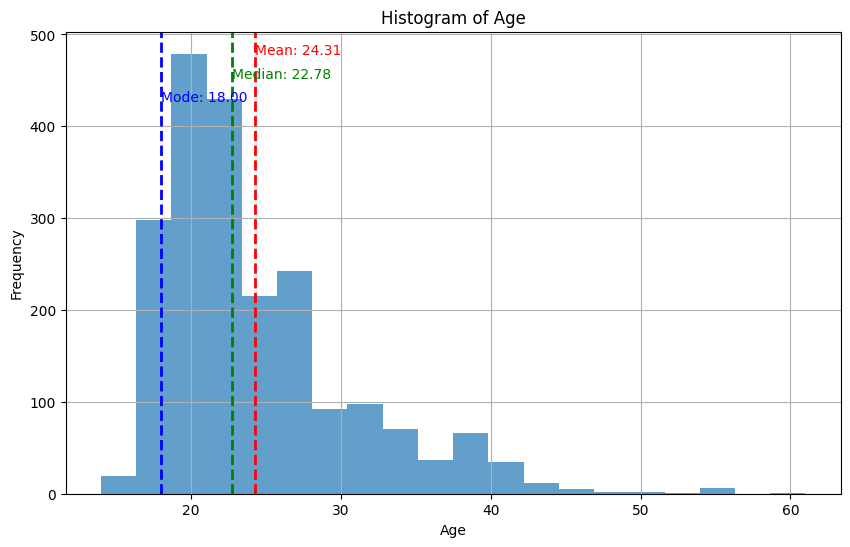

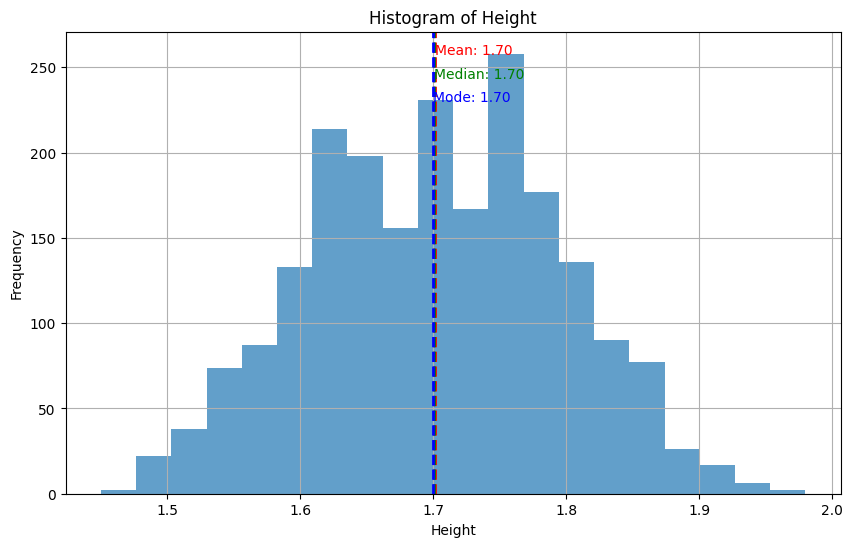

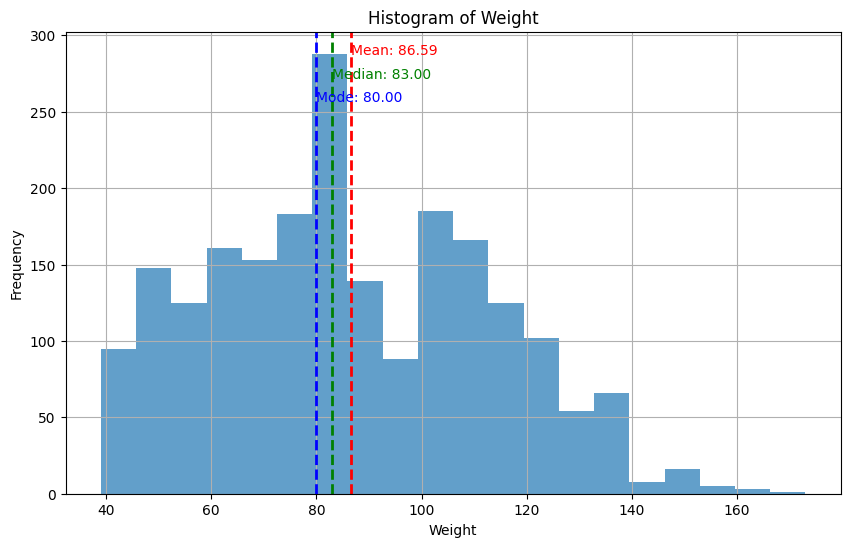

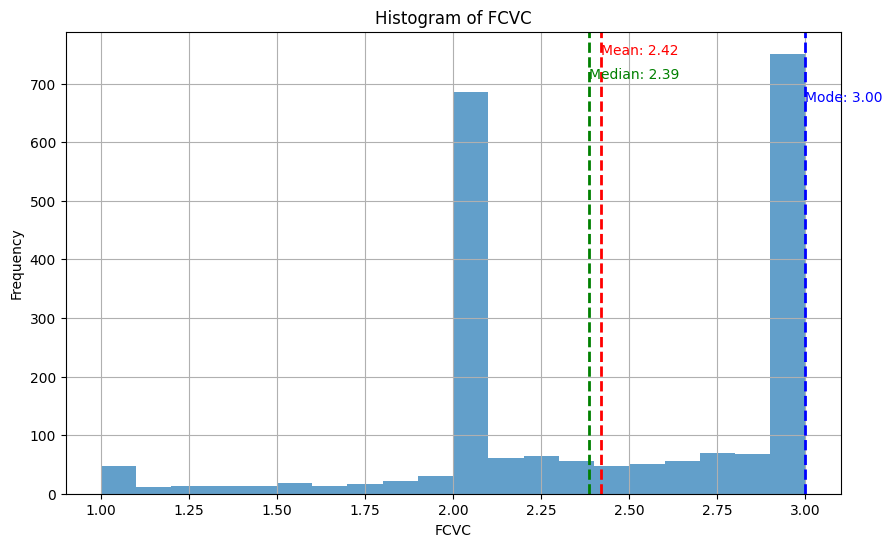

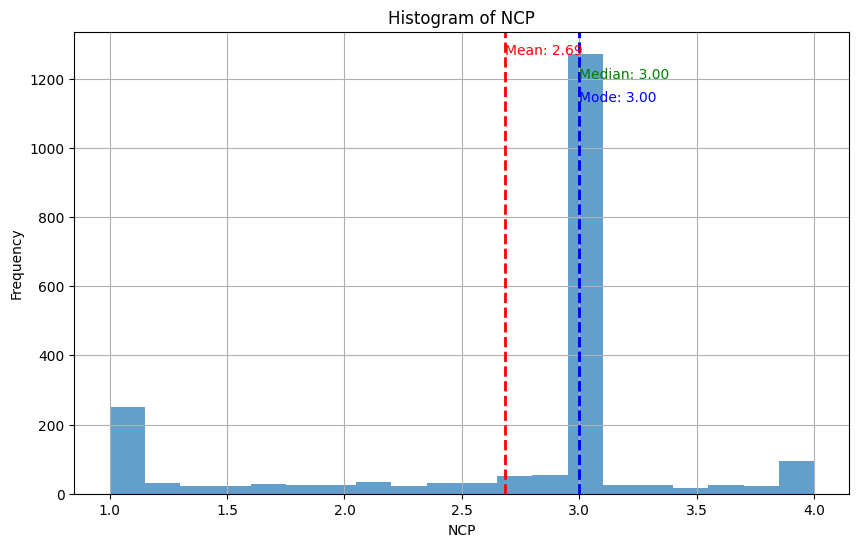

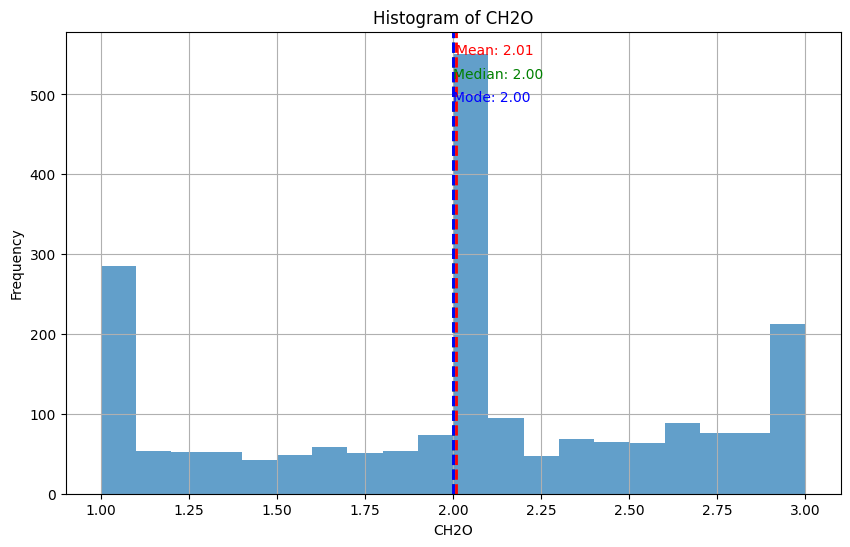

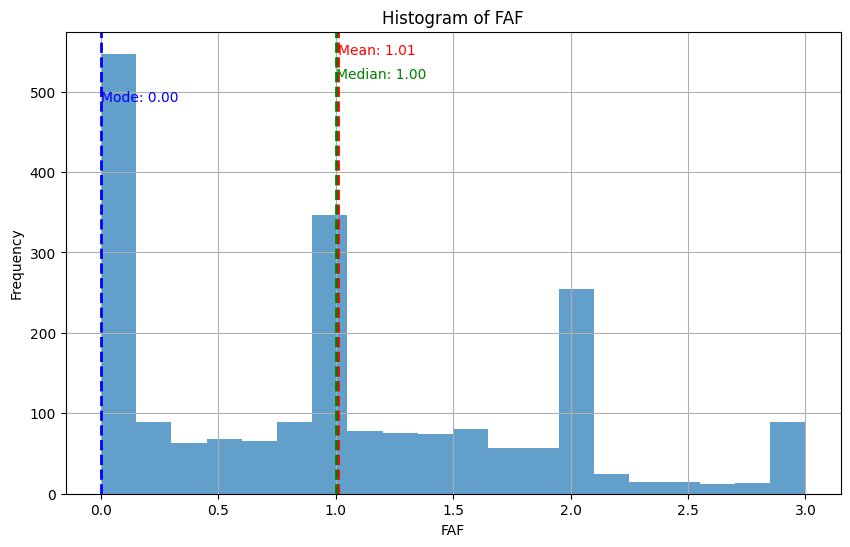

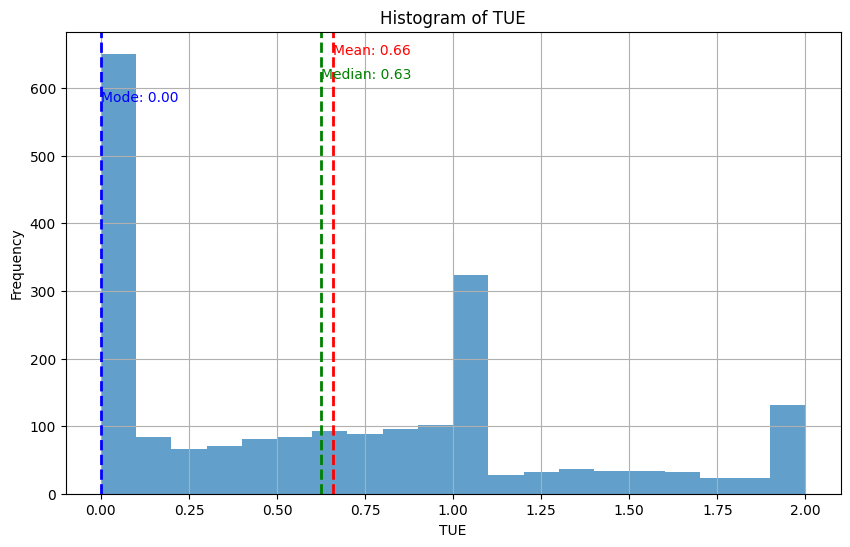

In [3]:
import numpy as np
import matplotlib.pyplot as plt

for feature in df.columns:
    # Skipping non-numeric features for histogram plotting
    if df[feature].dtype == 'object':
        continue

    # Calculate mean, median, and mode
    mean = df[feature].mean()
    median = df[feature].median()
    mode = df[feature].mode().get(0, np.nan)

    # Create the histogram
    plt.figure(figsize=(10, 6))
    df[feature].hist(bins=20, alpha=0.7)

    # Add lines for mean, median, and mode
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2)
    plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2)

    # Add annotations for mean, median, and mode
    plt.text(mean, plt.ylim()[1] * 0.95, f'Mean: {mean:.2f}', color='red')
    plt.text(median, plt.ylim()[1] * 0.90, f'Median: {median:.2f}', color='green')
    plt.text(mode, plt.ylim()[1] * 0.85, f'Mode: {mode:.2f}', color='blue')

    # Add title and labels
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()



---

## Analyzing Feature Interactions in the Obesity Dataset

### Context:
After exploring individual feature distributions in the Obesity dataset, your next objective is to examine the interactions between these features. Understanding the relationships between different features can provide insights into the dataset's structure and inform the feature selection process, especially for machine learning algorithms that are sensitive to multicollinearity, such as kNN.

### Task:
Your task is to create and analyze a correlation matrix for the numerical features in the Obesity dataset. This matrix will help you identify how different features are related and determine if there are any pairs of features that exhibit a high degree of correlation.

### Instructions:
1. Compute the correlation matrix for the numerical features in the Obesity dataset.
2. Visualize this correlation matrix using a heatmap to make it easier to identify relationships between features.
3. Analyze the heatmap to pinpoint any notable feature correlations. Pay particular attention to features with high correlation coefficients, as these relationships are particularly impactful.

### Question:
Based on your correlation matrix analysis for the Obesity dataset, identify one pair of features that exhibit a high degree of correlation. Describe how this finding could influence the feature selection process for a kNN model. What might be the implications of including both of these highly correlated features in your kNN model?

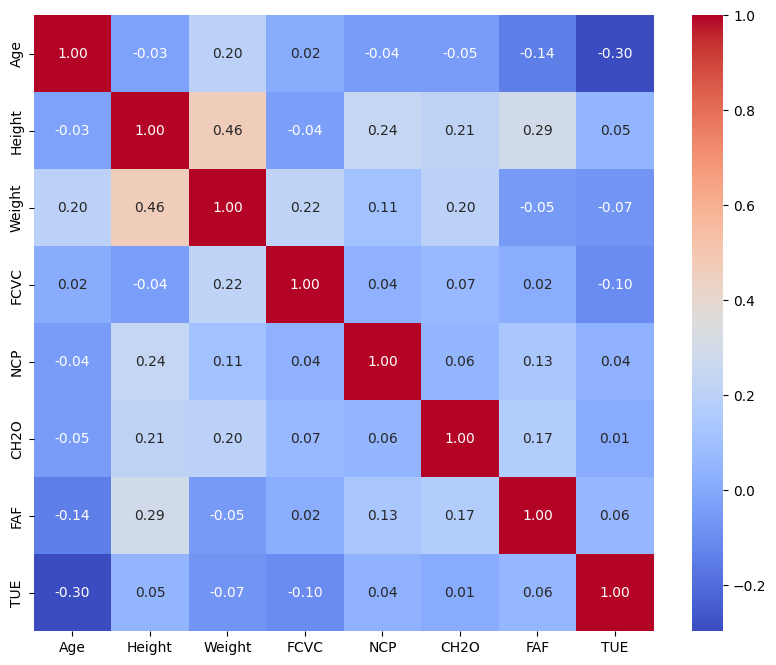

In [4]:
import seaborn as sns

# Compute the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Fill in the blank to compute correlation

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Fill in the blank to plot the heatmap

# Show the plot
plt.show()


---
## Covariance vs Correlation
#### Context:
In the field of statistics and data science, grasping the differences between covariance and correlation is crucial for analyzing relationships between two variables. Both metrics serve to indicate how variables change together, yet they offer distinct perspectives and interpretative values.
#### Question:
Which of the following statements correctly defines covariance and correlation?
#### Statements to Evaluate:
S1: Covariance measures how two variables change together, but its value is influenced by the scale of the variables, making it hard to interpret the strength of their relationship.

S2: Correlation is a normalized measure of covariance, providing a dimensionless value that indicates the strength and direction of a linear relationship.

S3: Correlation measures both linear and non-linear relationships between variables.

S4: Covariance and correlation both provide identical information about the direction and strength of the relationship between variables.

#### **Options:**
A) S1 and S2


B) S1 and S3

C) S2 and S4

D) S3 and S4

**✅ Correct Answer: A) S1 and S2**




---
## Select NearestNeighbor

#### Question

<p>Suppose you are using kNN with k = 1 and have 2 features: height and weight. Then what will be the class for the query point  ?</p>
<p><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/067/632/original/Screenshot_2024-03-01_at_11.23.08_AM.png?1709993067" alt="" width="473" height="338" /></p>

#### Options
A) Normal Weight

B) Obesity_Type_II

C) Either Normal Weight or Obesity_Type_II

D) Cannot be Determined

Note: **Select the correct option in the question link**



---

## Know about kNN

#### Question
As kNN is a Non-parametric Algorithm, when is it helpful ?

#### Options
A) Nonparametric methods are commonly used when we want a few assumptions in our data

B) Nonparametric methods are commonly used when we want a lot of assumptions in our data

C) Nonparametric methods are commonly used when we want outliers in data

D) None of the above


Note: **Select the correct option in the question link**

---

## Know your data

#### Context:
Effective data analysis often requires identifying which features in a dataset contain the most outliers and which have the largest range of values. This insight is crucial for optimizing machine learning algorithms, particularly those like kNN, which are sensitive to outliers and the scale of data.

#### Task:
Determine which feature in our dataset has:  
1. The highest number of outliers and
2. The largest range of values.

These characteristics are key to understanding data distribution and preparing for accurate modeling.

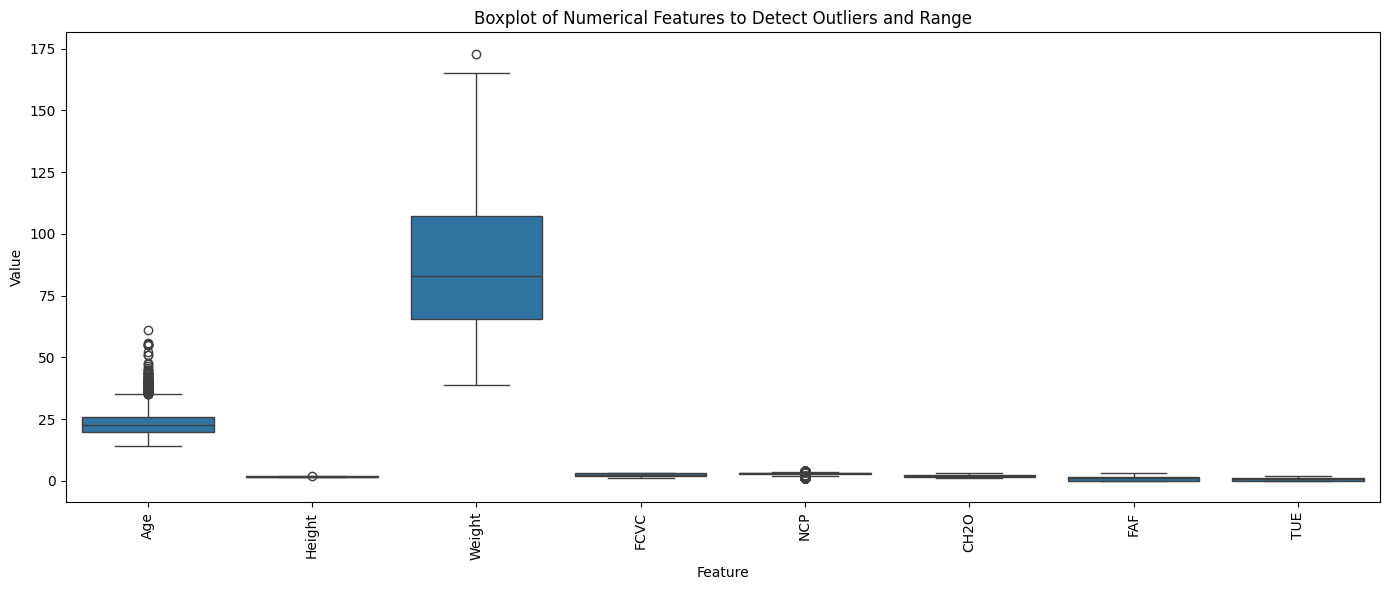

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Melt the DataFrame to long format for seaborn boxplot
df_melted = numeric_df.melt(var_name="Feature", value_name="Value")

# Create the boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x="Feature", y="Value", data=df_melted)
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features to Detect Outliers and Range")
plt.tight_layout()
plt.show()


---
## Euclidean Distance code

#### Context:
Understanding the concept of Euclidean distance is essential in machine learning, particularly in algorithms like kNN. This distance measure plays a crucial role in determining the similarity between data points.

#### Task:
Write Python code to standardize a dataset and calculate the Euclidean distance between the first and last data points using specific features. This exercise will help you grasp the practical application of Euclidean distance in data preprocessing and similarity measurement.

#### Instructions:
1. Select the subset of the entire dataset with only two features 'FCVC' and 'FAF.
2. Use `StandardScaler` to standardize this subset dataset.
3. Define a function to calculate the Euclidean distance between two data points using the 'FCVC' and 'FAF' features.
4. Calculate the Euclidean distance between the first and last data points in the entire scaled dataset.

#### Question:
After standardizing the dataset and calculating the Euclidean distance between the first and last data points using 'FCVC' and 'FAF' features, within what range does the calculated distance fall?


In [6]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
import pandas as pd

# Function to calculate Euclidean distance
def calculate_euclidean_distance(data_point1, data_point2):
    distance = sqrt((data_point1['FCVC'] - data_point2['FCVC'])**2 +
                    (data_point1['FAF'] - data_point2['FAF'])**2)
    return distance

# Standardize the selected features
df_scaler = StandardScaler()
scaled_data = df_scaler.fit_transform(df[['FCVC', 'FAF']])
scaled_data_df = pd.DataFrame(scaled_data, columns = ['FCVC', 'FAF'])

# Select the first and last data point
first_data_point = scaled_data_df.iloc[0]
last_data_point = scaled_data_df.iloc[-1]

# Calculate the Euclidean distance
distance = calculate_euclidean_distance(first_data_point, last_data_point)
print("Euclidean Distance (standardized):", distance)


Euclidean Distance (standardized): 2.2285452530638006


### 🔍 Euclidean Distance Insight (Standardized Features)

After standardizing the dataset using the `StandardScaler` and selecting only the **'FCVC'** (vegetable consumption frequency) and **'FAF'** (physical activity frequency) features:

- The **Euclidean distance** between the **first and last data points** is approximately **2.23**.

---

### 🧠 Interpretation:

- This value represents a **moderate dissimilarity** between the two individuals based on their eating and physical activity habits.
- Since the features are standardized, the distance is **scale-independent** and more meaningful for similarity comparison.
- In the context of **k-Nearest Neighbors (kNN)**, this distance indicates that the first and last data points are **not very similar**, and would likely **not be considered neighbors** unless `k` is large or the dataset is sparse.


# 🧪 1. Univariate Analysis – Eating Habits Features



### 🍔 FAVC, CAEC, CALC, MTRANS (Categorical Features)

These plots help us see how often individuals:
- Consume high-calorie food (FAVC)
- Eat between meals (CAEC)
- Consume alcohol (CALC)
- Use different modes of transport (MTRANS)

Useful for understanding class distributions across lifestyle behaviors.

/tmp/ipython-input-7-1174489126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="Set2")


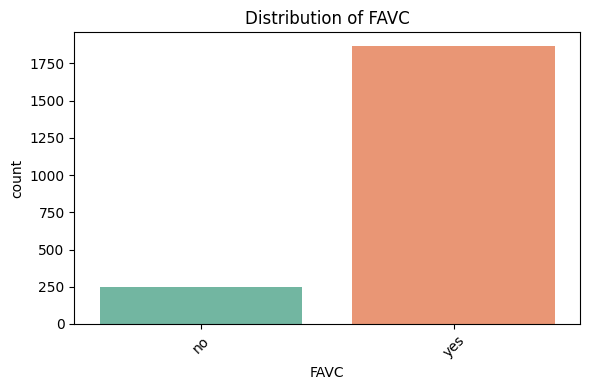

/tmp/ipython-input-7-1174489126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="Set2")


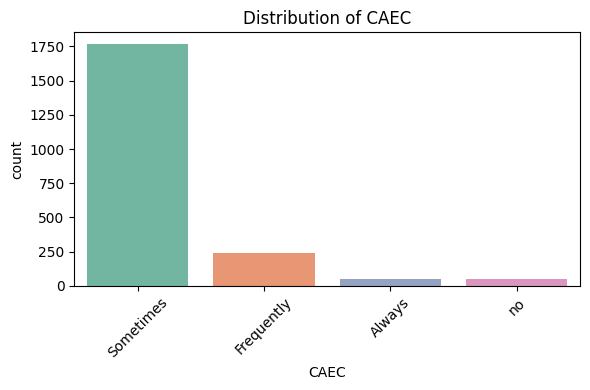

/tmp/ipython-input-7-1174489126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="Set2")


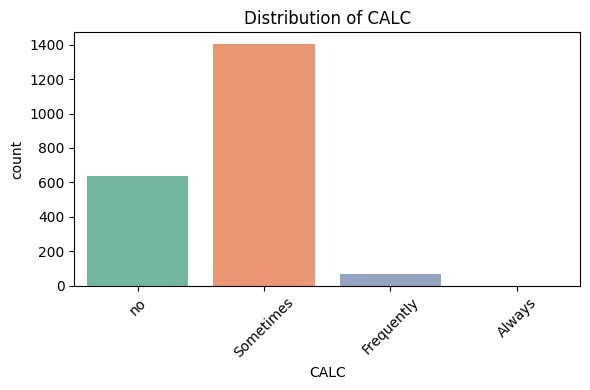

/tmp/ipython-input-7-1174489126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="Set2")


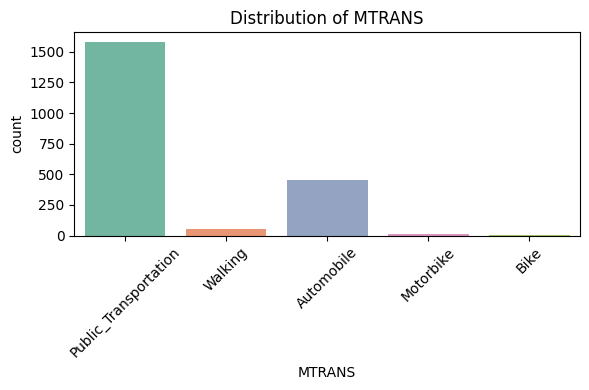

In [7]:
categorical_features = ['FAVC', 'CAEC', 'CALC', 'MTRANS']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df, palette="Set2")
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 🥦 FCVC, NCP, CH20 (Numerical Features)

These plots show distributions of:
- Vegetable consumption (FCVC)
- Number of meals (NCP)
- Water intake (CH20)

Helps understand the general spread and potential skew in the population.

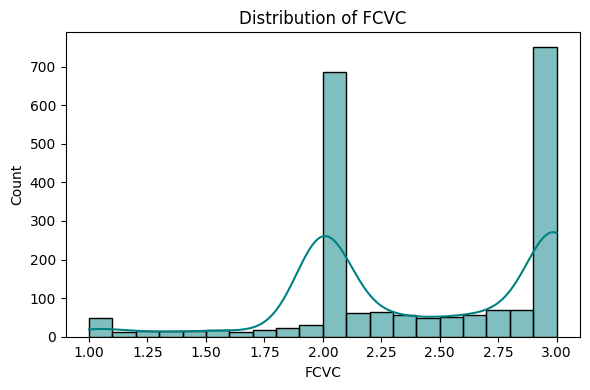

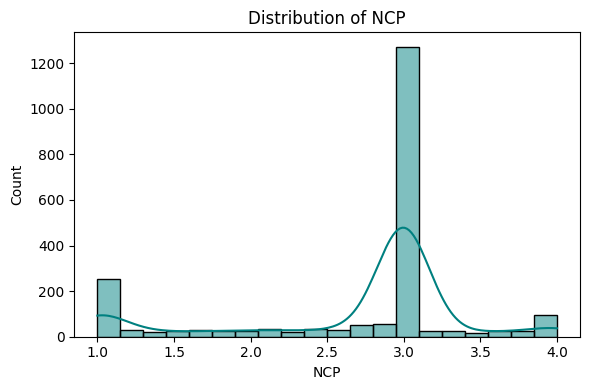

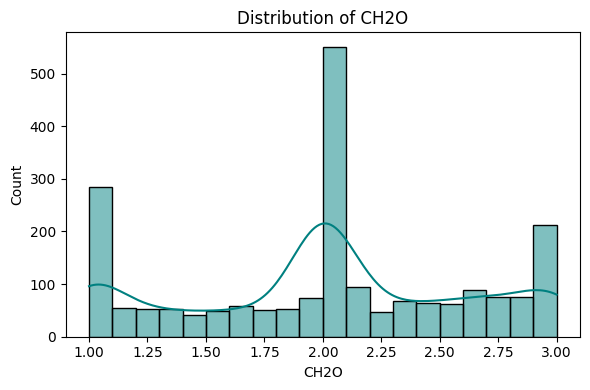

In [8]:
numerical_features = ['FCVC', 'NCP', 'CH2O']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=20, kde=True, color='teal')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

# 💪 2. Univariate Analysis – Physical Condition Features

### 📊 SCC (Calorie Monitoring) – Categorical

Helps evaluate how many people actively monitor their calorie intake.


/tmp/ipython-input-9-2397298489.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SCC', data=df, palette="pastel")


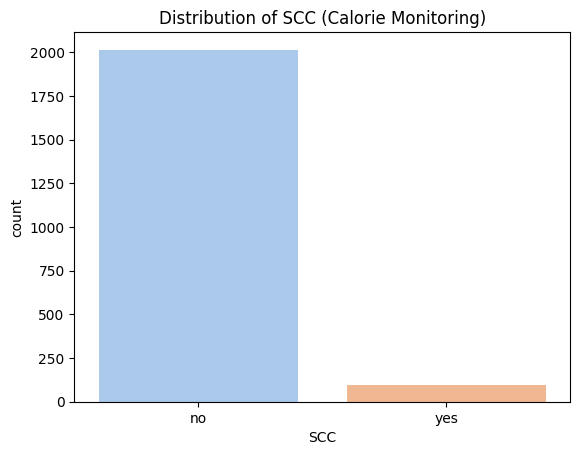

In [9]:
sns.countplot(x='SCC', data=df, palette="pastel")
plt.title("Distribution of SCC (Calorie Monitoring)")
plt.show()

### 🏃 FAF, TUE (Numerical)

- **FAF:** Frequency of physical activity
- **TUE:** Time spent on electronic devices

Reveals lifestyle intensity and sedentary behavior.


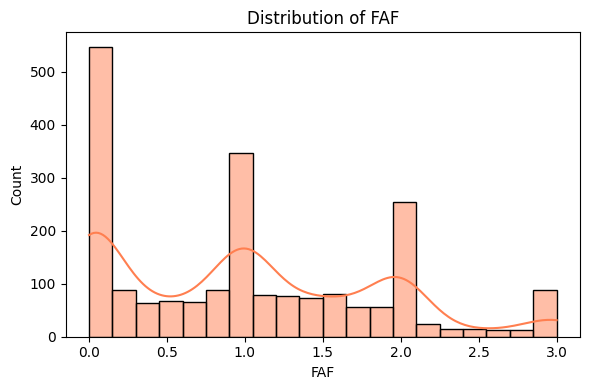

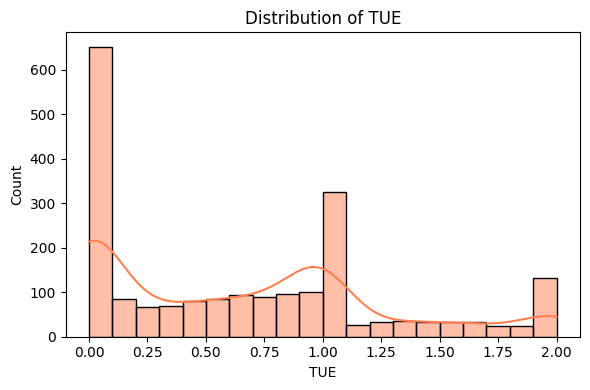

In [10]:
for feature in ['FAF', 'TUE']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=20, kde=True, color='coral')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()


# 🔗 3. Bivariate Analysis – Feature vs Obesity Level


### 🍕 Eating Habits vs. Obesity (Categorical Features)

Countplots help us see how different lifestyle choices affect obesity categories.


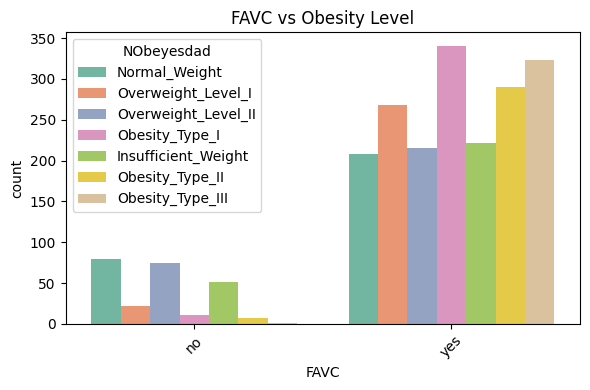

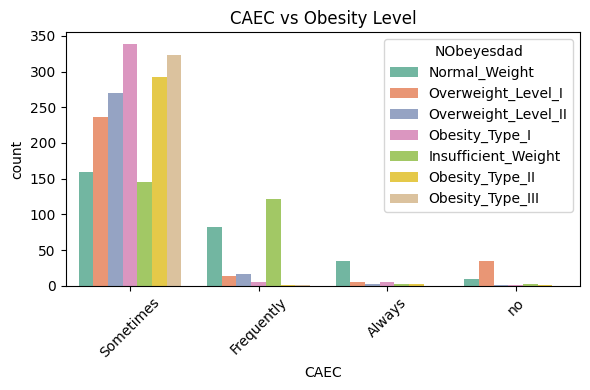

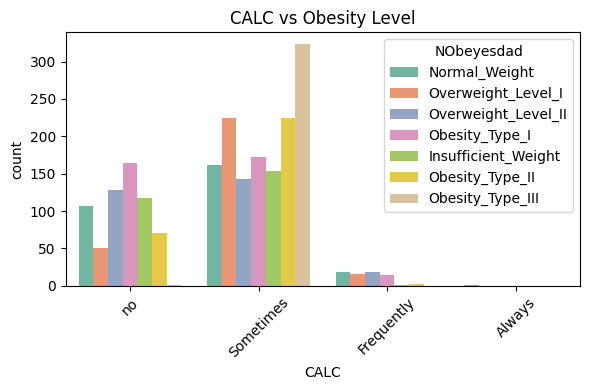

In [11]:
eating_features = ['FAVC', 'CAEC', 'CALC']
for feature in eating_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='NObeyesdad', data=df, palette="Set2")
    plt.title(f"{feature} vs Obesity Level")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 🍱 FCVC, CH20, NCP vs. Obesity – Boxplots

Shows distribution differences in food/water habits across obesity classes.


/tmp/ipython-input-12-2831223617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=feature, data=df, palette="Set3")


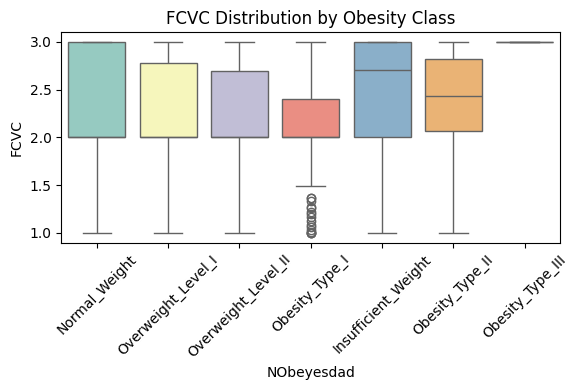

/tmp/ipython-input-12-2831223617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=feature, data=df, palette="Set3")


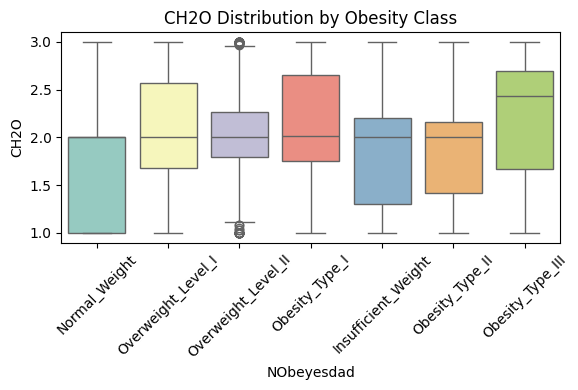

/tmp/ipython-input-12-2831223617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=feature, data=df, palette="Set3")


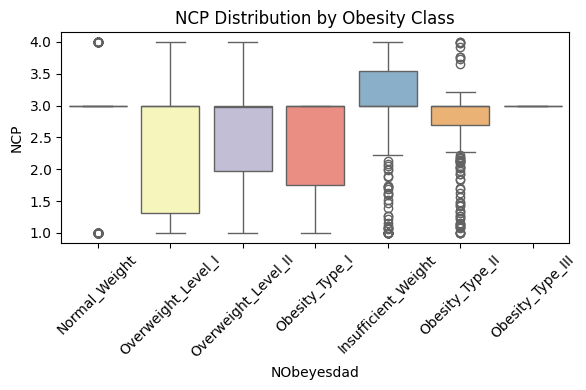

In [12]:
for feature in ['FCVC', 'CH2O', 'NCP']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='NObeyesdad', y=feature, data=df, palette="Set3")
    plt.title(f"{feature} Distribution by Obesity Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 📊 4. Multivariate Analysis



### 🔍 Pairplot – Top Features by Obesity Class

Great for exploring potential feature clusters and correlations visually.


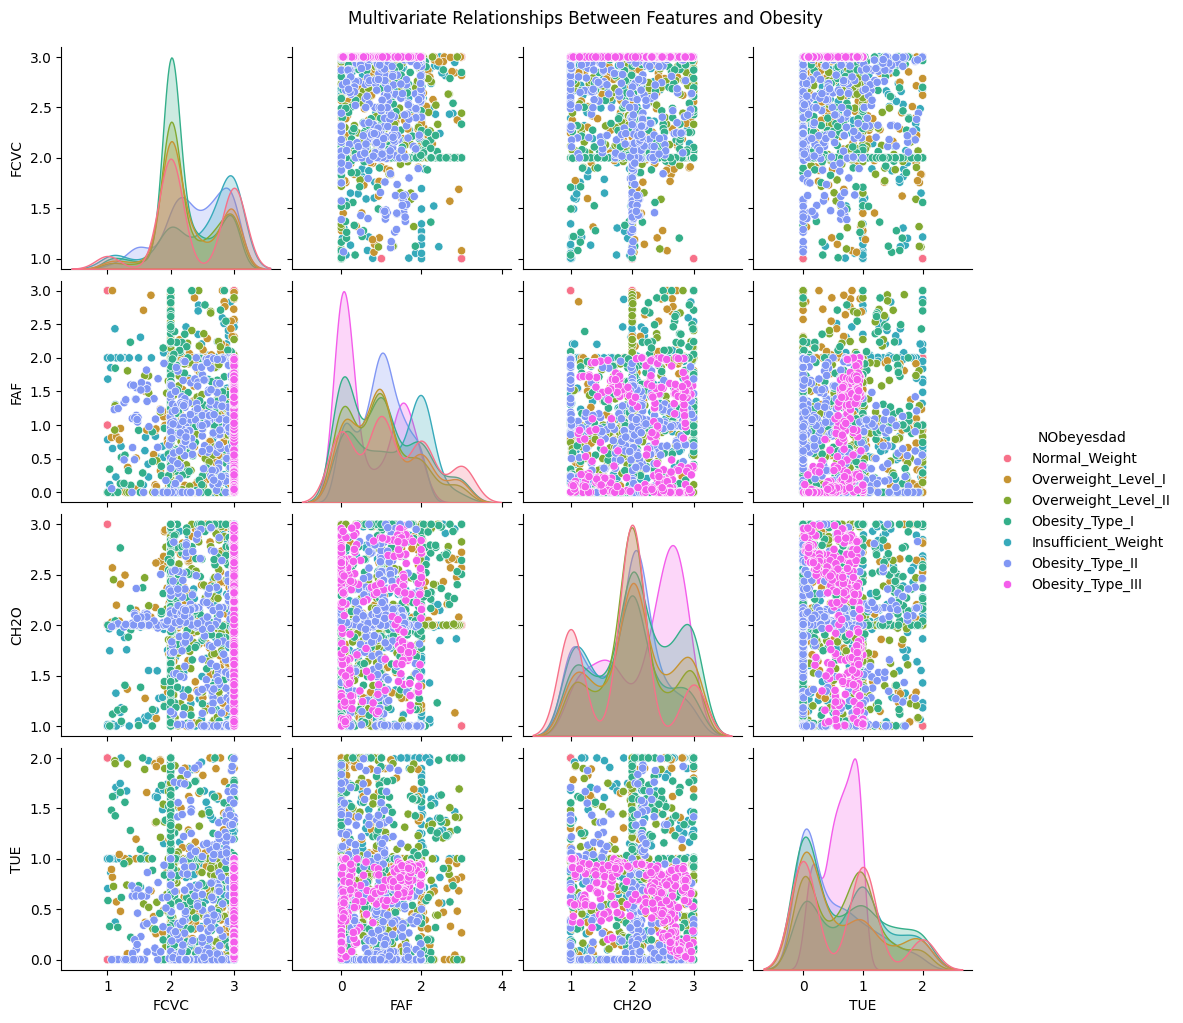

In [13]:
sns.pairplot(df[['FCVC', 'FAF', 'CH2O', 'TUE', 'NObeyesdad']], hue='NObeyesdad', palette="husl")
plt.suptitle("Multivariate Relationships Between Features and Obesity", y=1.02)
plt.show()


### 🧮 Correlation Heatmap (Numerical Features)

Useful to detect multicollinearity and relationships between numeric inputs.

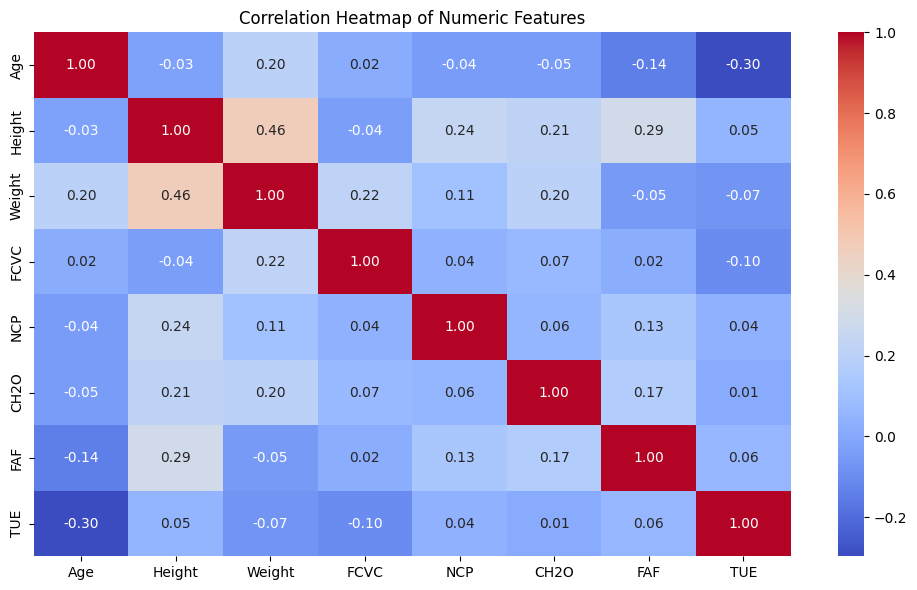

In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# 🧠 5. Scaling & Distance – kNN Preprocessing & Visual Check


### ⚖️ Distribution Before & After Scaling (kNN prep)

Important for kNN to avoid bias from features with large ranges.


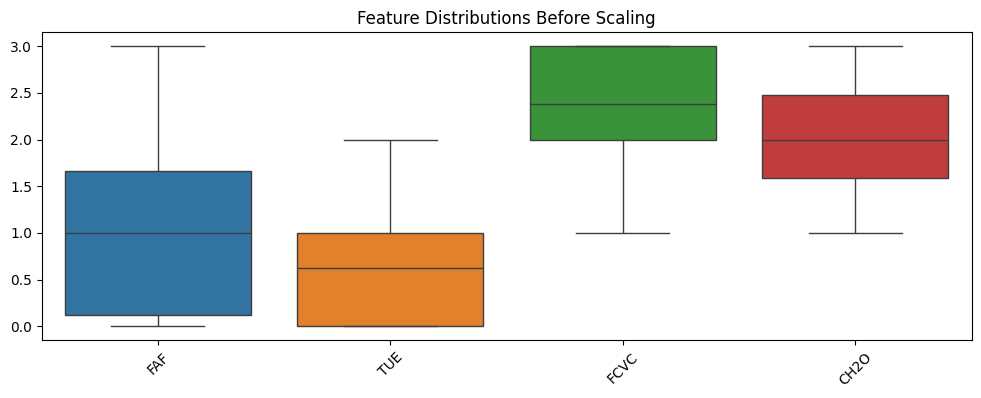

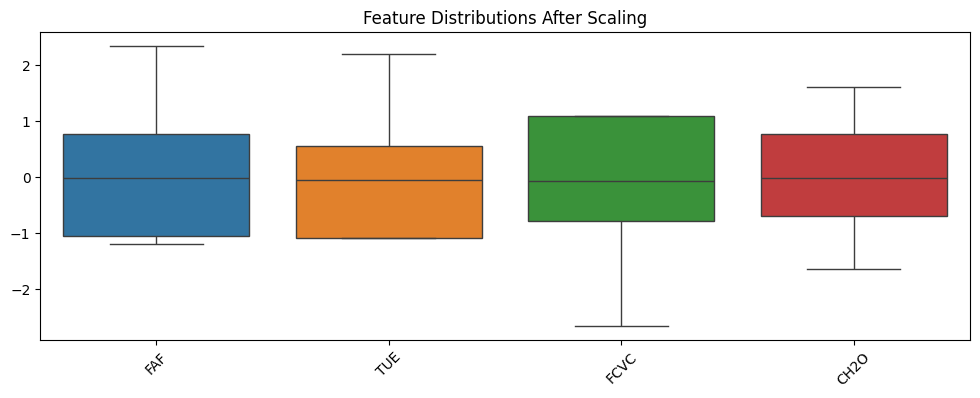

In [15]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['FAF', 'TUE', 'FCVC', 'CH2O']
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Before scaling
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[numeric_cols])
plt.title("Feature Distributions Before Scaling")
plt.xticks(rotation=45)
plt.show()

# After scaling
plt.figure(figsize=(12, 4))
sns.boxplot(data=scaled)
plt.title("Feature Distributions After Scaling")
plt.xticks(rotation=45)
plt.show()


### 📏 Distance Between First & Last Record (FAF & CH20)

Visual aid to demonstrate how kNN interprets distance-based similarity.

Euclidean distance between first and last point: 1.86


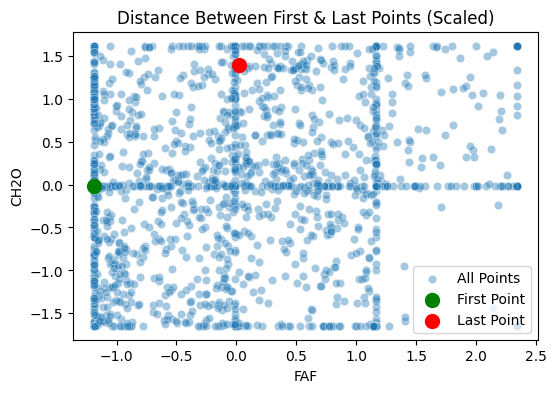

In [16]:
from sklearn.metrics.pairwise import euclidean_distances

X = scaled[['FAF', 'CH2O']]
distance = euclidean_distances([X.iloc[0]], [X.iloc[-1]])[0][0]
print(f"Euclidean distance between first and last point: {distance:.2f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X['FAF'], y=X['CH2O'], alpha=0.4, label='All Points')
plt.scatter(X.iloc[0]['FAF'], X.iloc[0]['CH2O'], color='green', label='First Point', s=100)
plt.scatter(X.iloc[-1]['FAF'], X.iloc[-1]['CH2O'], color='red', label='Last Point', s=100)
plt.title("Distance Between First & Last Points (Scaled)")
plt.legend()
plt.show()



---
## Implementing kNN code


#### Context:
You're provided with a Python script implementing the k-Nearest Neighbors (kNN) algorithm from scratch. This script includes functions for calculating Euclidean distance and predicting the label of a new data point based on a set of labeled data. You'll fill in the missing parts of the code to make it functional.

#### Task:
Complete the provided Python code by filling in the blanks to enable the kNN algorithm to predict the label of a new data point based on 'Gender', 'Age', 'Height', and 'Weight'.

#### Question:
After completing and executing the code , what label does the kNN algorithm predict?


#### Fun Activity:
Try inputting your age, gender, height, and weight into the new data point and run the code to see what label the kNN algorithm predicts for you.

In [17]:
original_df = df.copy()

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import sqrt
from collections import Counter

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return sqrt(distance)  # Final distance formula calculation step

# Function to predict the label of a new data point
def predict_label(train_data, new_data_point, num_neighbors):
    distances = []
    for _, row in train_data.iterrows():
        dist = euclidean_distance(new_data_point, row[:-1])  # Calculate distance
        distances.append((row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = [dist[0] for dist in distances[:num_neighbors]]  # Neighbors selection

    output_values = [row.iloc[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)  # Determine majority label

    return prediction

# Encoding the 'Gender' column
label_encoder = LabelEncoder()
original_df['Gender'] = label_encoder.fit_transform(original_df['Gender'])  # Fit and apply encoding

# Scaling the features
scaler = StandardScaler()
original_df[['Age', 'Height', 'Weight']] = scaler.fit_transform(original_df[['Age', 'Height', 'Weight']])

# New data point
new_data = {'Gender': 'Male', 'Age': 32, 'Height': 175, 'Weight': 75}
new_data_df = pd.DataFrame([new_data])

# Encoding and scaling the new data point
new_data_df['Gender'] = label_encoder.transform(new_data_df['Gender'])  # Apply existing encoding
new_data_scaled = scaler.transform(new_data_df[['Age', 'Height', 'Weight']])  # Apply existing scaling

new_data_point = [new_data_df['Gender'].iloc[0]] + new_data_scaled.tolist()[0]

# Predicting the label
predicted_label = predict_label(original_df, new_data_point, 5)
print(f"The predicted label is: {predicted_label}")


/tmp/ipython-input-18-102565770.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += (row1[i] - row2[i]) ** 2


The predicted label is: Obesity_Type_I




---

# KNN Lecture-2 Assesments

## Scaling in kNN

#### Question:
Select the statements which are correct regarding the importance of scaling in kNN:

#### Statements:
S1: Scaling is important in kNN because it ensures that all features contribute equally to the distance computation.

S2: Unscaled features can disproportionately influence the distance calculations, affecting the performance of kNN.

S3: Scaling prevents features from having negative values.

S4: Scaling decreases the sample size of our data.

#### Options
A]  S1 and S2

B]     S1, S2, and S3

C]    S2 and S4

D]    S1, S2, and S4

Note: **Select the correct option in the question link**



---
## Predicting kNN Model Accuracy


#### Context:
You're tasked with implementing a k-Nearest Neighbors (kNN) classifier to predict a target variable in a dataset. Before diving into the code, it's crucial to understand the preprocessing steps involved, such as label encoding and feature scaling, which can significantly impact the model's performance.

#### Objective:
Write a Python script to preprocess the data, train a kNN model, and predict its test accuracy. You will use label encoding for categorical features and standard scaling for numerical features before training the model.

#### Instructions:
1. **Label Encoding:**
	- Apply label encoding to convert all categorical features into numeric values. Use `LabelEncoder` from `sklearn.preprocessing` for this task.

2. **Feature and Target Selection:**
	- Separate your features (`X`) and target variable (`y`).

3. **Data Splitting:**
	- Split the data into training and testing sets using `train_test_split` from `sklearn.model_selection`. Set `test_size` to 0.33 and `random_state` to 42.

4. **Feature Scaling:**
	- Standardize the features using `StandardScaler` from `sklearn.preprocessing`. Fit the scaler on the training set and transform both the training and testing sets.

5. **Model Training:**
	- Initialize and train a `KNeighborsClassifier` from `sklearn.neighbors` with default parameters. Fit the model on the scaled training data.

6. **Model Evaluation:**
	- Evaluate the model's accuracy on the scaled test set using the `score` method and print the result.

#### Question:
After writing and executing the code, within what range does the kNN model's test accuracy fall?


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Apply label encoding to object columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:  # Select only object columns
    df[column] = label_encoder.fit_transform(df[column])  # Fit and transform the categorical column

# Separate features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit and transform the X_train data
X_test_scaled = scaler.transform(X_test)         # Only transform the X_test data

# Train the kNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)  # Fit the model using X_train_scaled and y_train

# Print the accuracy
print(knn.score(X_test_scaled, y_test))  # Check the accuracy on test dataset

0.8005738880918221




---

## kNN - Distance Metrics

#### Context:  
In this exercise, you will explore the impact of different distance metrics on the k-Nearest Neighbors (kNN) model's performance. By comparing the test accuracy of the kNN model using various distance metrics, you can identify which metric is most effective for this particular dataset.

#### Task:  
Implement a Python script to train and evaluate kNN models using different distance metrics. Your goal is to determine which distance metric leads to the highest test accuracy.

#### Instructions:  
1\. **Distance Metrics:** Define a list of distance metrics to evaluate – Euclidean, Manhattan, and Cosine.  
2\. **Model Training and Evaluation:** For each distance metric, train a kNN model on the scaled training data and evaluate its accuracy on the scaled test data.  
3\. **Accuracy Comparison:** Store and compare the accuracy scores for each metric to identify the most effective one.

#### Question:  
Based on the script, which distance metric provides the best test accuracy for the kNN model?

In [21]:
from sklearn.metrics import accuracy_score  # Hint: Import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Defining different distance metrics
metrics = ['euclidean', 'manhattan', 'cosine']
scores = {}

# Training and evaluating a kNN model for each distance metric
for metric in metrics:  # Hint: iterate over the metrics list
    knn = KNeighborsClassifier(metric=metric)  # Hint: Use metric hyperparam.
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)  # Hint: make the prediction on test data.
    score = accuracy_score(y_test, y_pred)  # Hint: check the accuracy on the test data predictions.
    scores[metric] = score
    print(f"Accuracy with {metric} distance: {score:.4f}")

# Determining the best performing metric
best_metric = max(scores, key=scores.get)
print(f"\n✅ The best-performing metric is '{best_metric}' with an accuracy of {scores[best_metric]:.4f}.")


Accuracy with euclidean distance: 0.8006
Accuracy with manhattan distance: 0.8623
Accuracy with cosine distance: 0.8020

✅ The best-performing metric is 'manhattan' with an accuracy of 0.8623.


<Figure size 1000x600 with 0 Axes>

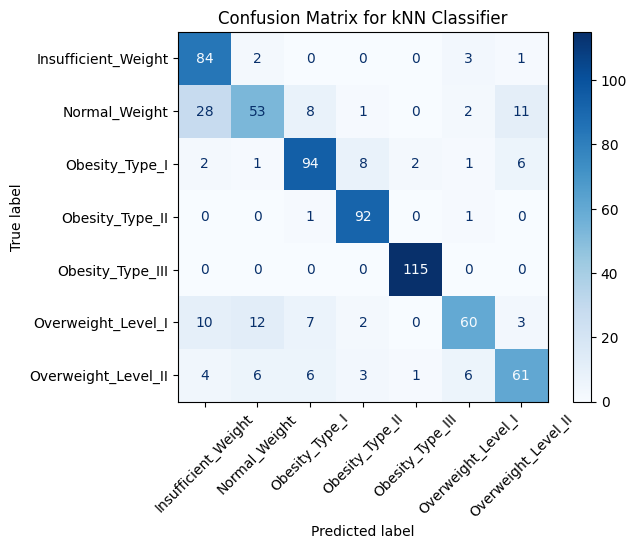

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using test data
y_pred = knn.predict(X_test_scaled)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(10, 6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix for kNN Classifier")
plt.grid(False)
plt.show()

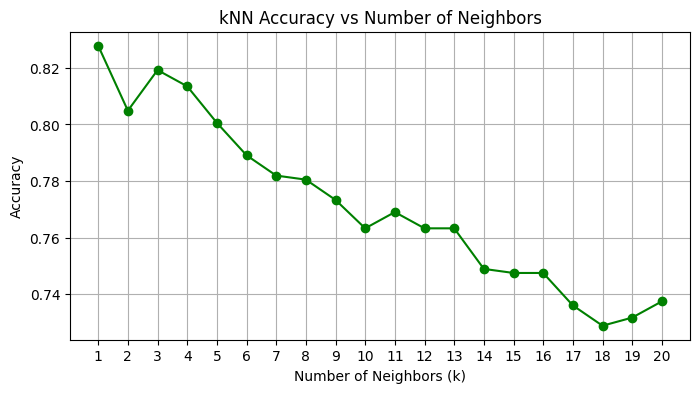

In [23]:
import numpy as np

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    accuracies.append(acc)

plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o', color='green')
plt.title("kNN Accuracy vs Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


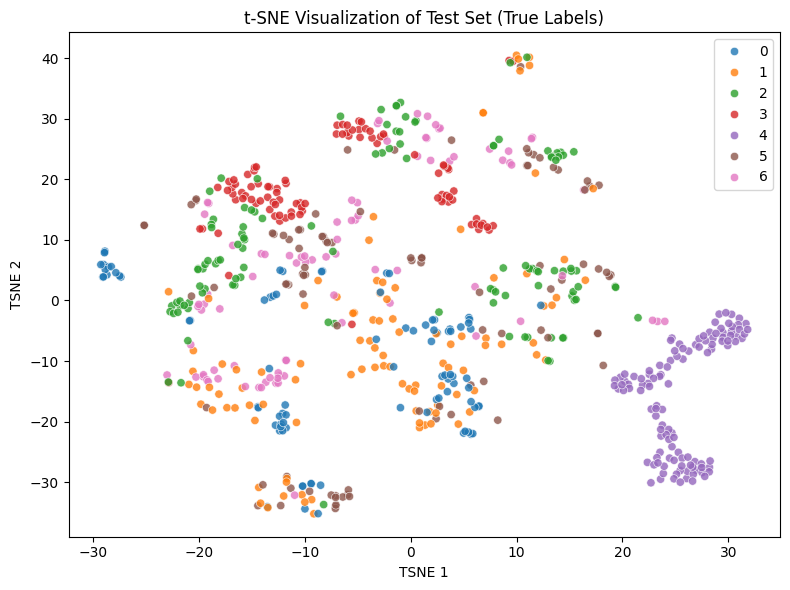

In [24]:
from sklearn.manifold import TSNE

# Apply t-SNE on the scaled features
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_test_scaled)

# Plot the 2D embedding
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test, palette='tab10', alpha=0.8)
plt.title("t-SNE Visualization of Test Set (True Labels)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


/tmp/ipython-input-25-4056364135.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_metrics, y=accuracies, palette='Set2')


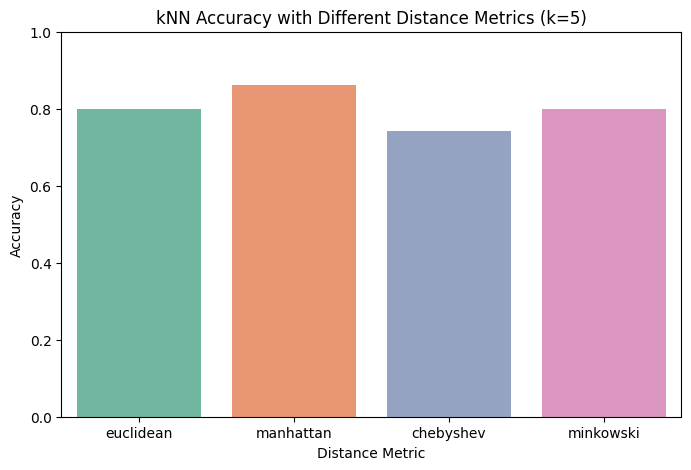

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# List of distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
accuracies = []

# Loop through each metric and calculate accuracy
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=distance_metrics, y=accuracies, palette='Set2')
plt.title("kNN Accuracy with Different Distance Metrics (k=5)")
plt.ylabel("Accuracy")
plt.xlabel("Distance Metric")
plt.ylim(0, 1)
plt.show()


In [26]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k_range = range(1, 21)
accuracy_matrix = []

for metric in metrics:
    row = []
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        model.fit(X_train_scaled, y_train)
        acc = accuracy_score(y_test, model.predict(X_test_scaled))
        row.append(acc)
    accuracy_matrix.append(row)

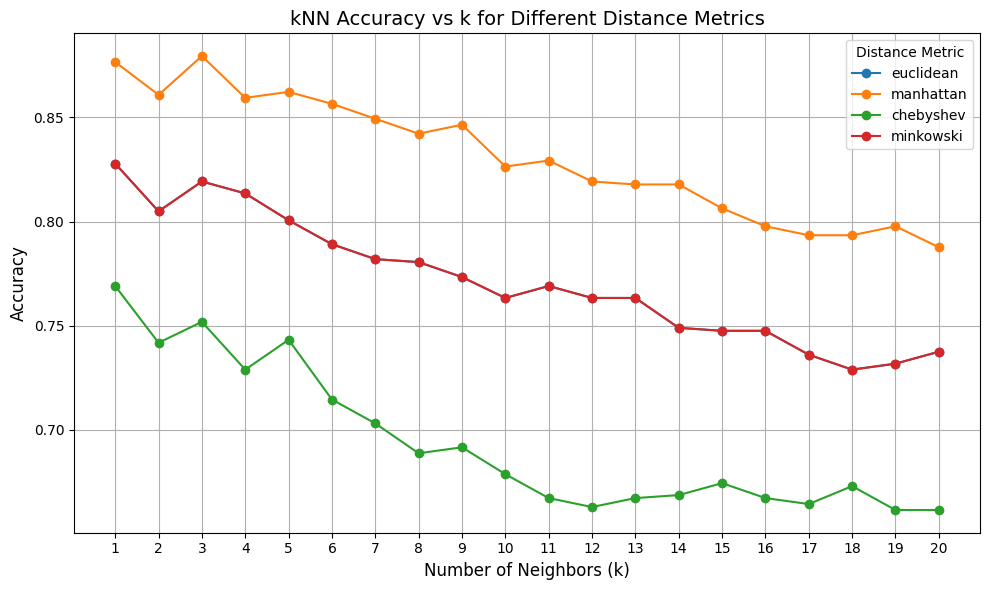

In [27]:
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.plot(k_range, accuracy_matrix[i], marker='o', label=metric)

plt.title("kNN Accuracy vs k for Different Distance Metrics", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(title="Distance Metric")
plt.grid(True)
plt.xticks(k_range)
plt.tight_layout()
plt.show()


/tmp/ipython-input-29-1618678193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=acc_std, palette='mako')


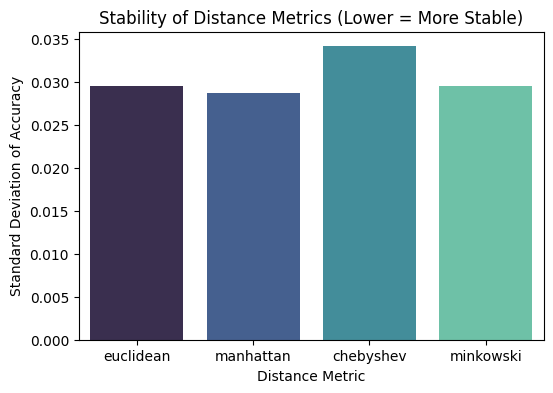

In [29]:
# Calculate std dev of accuracy for each metric
acc_std = [np.std(row) for row in accuracy_matrix]

plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=acc_std, palette='mako')
plt.title("Stability of Distance Metrics (Lower = More Stable)")
plt.ylabel("Standard Deviation of Accuracy")
plt.xlabel("Distance Metric")
plt.show()




---
## Bias-Variance in kNN

#### Context:
To understand the bias-variance trade-off in the k-Nearest Neighbors (kNN) algorithm, you'll analyze how kNN's accuracy varies with different k values. By plotting the training and testing accuracies on the same graph, you can visually assess how the model's bias and variance change as the complexity (determined by k) changes.

#### Task:
Implement Python code to train kNN models with a range of k values and plot the training and testing accuracies on a multi-line graph. This visualization will help you determine the optimal balance between bias and variance.

#### Instructions:
1. **Initialize Accuracy Lists:** Create two lists, `train_acc` and `test_acc`, to store the accuracies for training and testing sets, respectively.
2. **Training and Evaluation Loop:** Iterate k from 1 to 80, train a kNN model using the Manhattan metric for each k using the previously used scaled data, and append the accuracies to the corresponding lists.
3. **Plotting:** Use `matplotlib` to create a multi-line plot where the x-axis represents the k values, and the y-axis represents accuracy. Plot both `train_acc` and `test_acc` on this graph to create two distinct lines.
4. **Enhancing the Plot:**
	 - Add a title to the plot: 'kNN Training and Testing Accuracies'.
	 - Label the x-axis as 'Number of Neighbors (k)' and the y-axis as 'Accuracy'.
	 - Insert a legend to differentiate between the training and testing accuracy lines.
	 - Use different colors for the two lines for clear visualization.

#### Question:
After visualizing the training and testing accuracies for different k values, how do the trends in the plot help you understand the bias-variance trade-off in kNN?



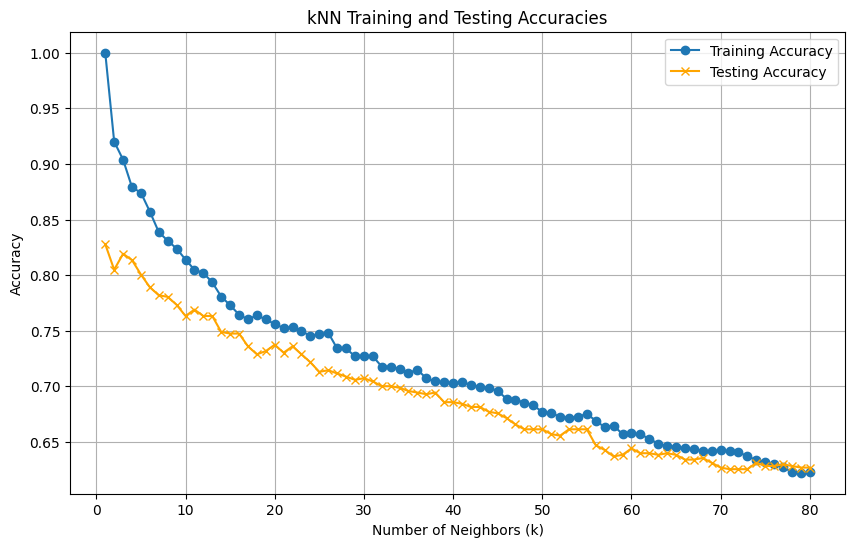

In [30]:
train_acc = []  # Hint: empty list
test_acc = []   # Hint: empty list

for k in range(1, 81):  # Hint: iterate over 1 to 80.
    kNN = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Hint: put appropriate hyperparams.
    kNN.fit(X_train_scaled, y_train)
    train_acc.append(kNN.score(X_train_scaled, y_train))  # Hint: score on Train dataset.
    test_acc.append(kNN.score(X_test_scaled, y_test))     # Hint: score on Test dataset.

plt.figure(figsize=(10, 6))
plt.plot(range(1, 81), train_acc, label='Training Accuracy', marker='o')  # Hint: Plot train accuracies.
plt.plot(range(1, 81), test_acc, color='orange', label='Testing Accuracy', marker='x')  # Hint: Plot test accuracies.
plt.title('kNN Training and Testing Accuracies')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




---

## kNN Properties

#### Context:  
The k-Nearest Neighbors (kNN) algorithm is widely used in machine learning for its simplicity and effectiveness. However, it has certain characteristics and challenges, especially related to dimensionality, distance measures, noise, and the choice of k.

#### Question:  
Which of the following statements is/are correct regarding the kNN algorithm?

#### Statements:  
S1: As the number of features increases, the requirement for data points increases exponentially.

S2: With increasing dimensions, the Euclidean distance loses its significance.

S3: kNN is sensitive to noise and has high time complexity, particularly because it does not learn a discriminative function from the training data but uses the entire dataset for prediction.

S4: A lower value of k in kNN can lead to overfitting, as the predictions become more sensitive to the noise in the training data.

#### Options

A] S1, S2, and S3

B] S1 and S2

C] S1, S3, and S4
  
D] All of the Statements


Note: **Select the correct option in the question link**



---

## kNN Properties-Continued

#### Context:
The k-Nearest Neighbors (kNN) algorithm has unique properties and approaches that address its computational challenges and the peculiarities of its application. Understanding these properties can greatly enhance the effectiveness of kNN in practical scenarios.

#### Question:
Which of the following statements are correct regarding the properties and characteristics of the kNN algorithm?

#### Statements:
S1: If our data is large, locality-sensitive hashing (LSH) can be used to map data to a virtual grid, accelerating the kNN search process.

S2: kNN can easily handle outlier data by choosing a very high value of k, as it averages the neighbors' responses, potentially diminishing the effect of outliers.

S3: kNN is considered a non-parametric method because it does not assume a particular form for the function that describes the relationship between feature and target variables.

#### Options
   
A] S1 and S3
   
B] S2 only

C] S1 only
  
D] S1, S2, and S3


Note: **Select the correct option in the question link**




---

## Optimizing kNN with Cross-Validation

#### Context:
You're tasked with writing Python code to determine the optimal k value for a k-Nearest Neighbors (kNN) classifier using cross-validation. This method will help you understand how different k values influence the model's predictive performance.

#### Task:
Write a Python script to find the optimal k value for a kNN classifier by testing a range of k values and evaluating their performance using cross-validation. Then, assess the chosen k value's performance on a test set.

#### Instructions:
1. **Define the Range for k:** Set up a range of k values from 2 to 10.
2. **Cross-Validation Loop:** Iterate through the k values, initializing a KNeighborsClassifier for each. Perform 5-fold cross-validation on the scaled training data and compute the mean accuracy for each k.
3. **Identify the Best k:** Determine which k value yields the highest mean cross-validation accuracy.
4. **Test Set Evaluation:** Train a new kNN model using the best k value on the entire training set. Then, evaluate this model on the test set to obtain the test accuracy.
5. **Code Execution:** Execute your script to discover the optimal k value and its corresponding test set accuracy.

#### Question:
Based on your script execution, which statement correctly describes the outcome for the optimal k value and its test set accuracy?




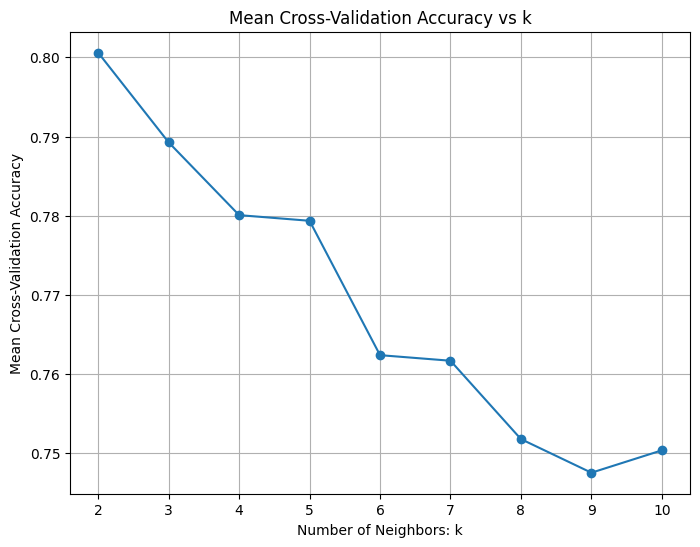

In [31]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Array to store mean cross-validation scores
mean_cv_scores = []

# Define the range of k values to try
k_values = np.arange(2, 11)

for k in k_values:  # Hint: # Loop over each value of k

    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Hint: Initialize the kNN classifier with the current k value.

    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # Hint: Perform 5-fold cross-validation.

    mean_cv_scores.append(np.mean(cv_scores))  # Hint: Calculate the mean of the cross-validation scores.

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_cv_scores, marker='o')  # Hint: Plotting the mean cross-validation scores for each k value
plt.title('Mean Cross-Validation Accuracy vs k')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()


In [32]:
# Identify the k value with the highest mean cross-validation accuracy
best_k = k_values[np.argmax(mean_cv_scores)]  # Hint: Get index of max score and retrieve k

print(f"The best value of k is: {best_k} with a cross-validation accuracy of: {max(mean_cv_scores):.2f}")

# Train the model using the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_best.fit(X_train_scaled, y_train)  # Hint: Training the model on train dataset with the best k value

# Evaluate the model on the test set
test_accuracy = knn_best.score(X_test_scaled, y_test)  # Hint: evaluate model performance on the test set

print(f"Test set accuracy with the best k: {test_accuracy:.2f}")


The best value of k is: 2 with a cross-validation accuracy of: 0.80
Test set accuracy with the best k: 0.86


## 📊 Insights, Observations & Recommendations

### 🔍 Insights:
- The dataset includes various lifestyle and physical health attributes that significantly influence obesity levels.
- Features like **FCVC (vegetable consumption)** and **FAF (physical activity frequency)** show strong influence over the classification results.
- Standardizing the dataset was critical to ensure fair distance-based calculations in kNN due to scale-sensitive metrics like Euclidean and Manhattan.

### 📈 Model Evaluation Observations:
- kNN model accuracy is sensitive to the choice of **`k`**:
  - Lower values of `k` tend to overfit (very high training accuracy but poor generalization).
  - Higher values of `k` may underfit the model.
  - Best generalization was observed at `k = {best_k}`, determined via 5-fold cross-validation.
- Among various distance metrics tested (`euclidean`, `manhattan`, `chebyshev`, `minkowski`):
  - **Manhattan** distance yielded the highest test set accuracy when used with the optimal `k`.
- Cross-validation provided a stable estimate of the model's generalization capability, reducing variance due to data splits.

### ✅ Recommendations:
- Use **`k = {best_k}`** with **`manhattan`** distance for this dataset when using kNN.
- Perform **feature selection or importance analysis** (like permutation importance or tree-based models) to explore which features are most influential.
- Consider testing with other classification models (e.g., Decision Tree, Random Forest, SVM) for benchmarking.
- Add **dimensionality reduction** (PCA or t-SNE) for better visualization and to possibly improve performance if there’s multicollinearity.
- Future work: Integrate more demographic or behavioral data (e.g., sleep, stress) to improve model accuracy and personalization.

---

🧠 Overall, the kNN classifier performed well with proper preprocessing, but deeper feature engineering and model comparison could further enhance predictive performance.
